### **1. Import library**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

### **2. Get Data**

##### **2.1 Get Data**

In [2]:
# Mount drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.mkdir('Lesson 4')
path_lesson = os.path.join('/content', 'Lesson 4')
os.chdir(path_lesson)

In [4]:
# Unzip dataset vào thư mục 'Lesson 2'
import zipfile
dataset_name = 'AI Specialist Lesson 04.zip'
path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_path = os.path.join(path, dataset_name)

with zipfile.ZipFile(data_path, 'r') as dataset_zip_file:
  dataset_zip_file.extractall(path_lesson)

In [5]:
os.listdir(path_lesson)

['AI Specialist Lesson 04']

In [6]:
pokemon = pd.read_csv('AI Specialist Lesson 04/pokemon.csv')
combat = pd.read_csv('AI Specialist Lesson 04/combats.csv')

print(pokemon.shape)
print(combat.shape)

display(pokemon.head())
display(combat.head())

(800, 12)
(50000, 3)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


##### **2.2 Describe Data**

In [7]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
pokemon.describe(include='number')

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
pokemon.describe(include='O') # Object

,Name,Type 1,Type 2
count,799,800,414
unique,798,18,18
top,Nidoran,Water,Flying
freq,2,112,97


In [10]:
pokemon.describe(include='all')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,798,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Nidoran,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,2,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [11]:
combat.describe(include='all')

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


### **3. Preprocessing Data**

In [12]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [13]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [14]:
pokemon[pokemon['Name'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [15]:
pokemon.loc[60:65, :]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False


In [16]:
pokemon.loc[62, ['Name']] = 'Primaepe'
pokemon.loc[60:65, :]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,Primaepe,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False


In [17]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### **4. Xây dựng các insight**

##### **4.1 Combat ==> Wining Precent ==> Combine with HP	,Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed ==> Problem Definition**

>**Ví dụ về groupby() và count()**
* Groupby theo cột nào thì sẽ tìm các unique của cột đó làm chuẩn, sau đó count sẽ đếm các giá trị ở cột khác.

In [75]:
technologies   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000],
    'Duration':['30days','50days','35days','40days','60days','35days','55days','50days'],
    'Discount':[1000,2300,1000,1200,2500,1300,1400,1600]
                })
df = pd.DataFrame(technologies, columns=['Courses','Fee','Duration','Discount'])
display(df)

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000
1,PySpark,25000,50days,2300
2,Hadoop,23000,35days,1000
3,Python,24000,40days,1200
4,Pandas,26000,60days,2500
5,Hadoop,25000,35days,1300
6,Spark,25000,55days,1400
7,Python,22000,50days,1600


In [76]:
df2 = df.groupby('Courses').count()
display(df2)

,Fee,Duration,Discount
Courses,,,
Hadoop,2,2,2
Pandas,1,1,1
PySpark,1,1,1
Python,2,2,2
Spark,2,2,2


* Second_pokemon và Winner chỉ là đếm số giá trị của unique của First_pokemon, tức là số trận mà mỗi pokemon ở cột này tham gia.

In [77]:
display(combat.groupby('First_pokemon').count().head())

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50


* Tương tự với groupby Second_pokemon

In [78]:
display(combat.groupby('Second_pokemon').count().head())

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62


* Đếm số lượng các unique của winner Ex: Con 163 có 152 lần xuất hiện ==> thắng 152 lần.
* Lưu ý: Cũng có thể sẽ có con ko thắng trận nào ==> sẽ không xuất hiện pokedex của con đó tong cột index.

In [79]:
combat['Winner'].value_counts()

163    152
438    136
154    136
428    134
314    133
      ... 
577      5
237      4
639      4
290      3
190      3
Name: Winner, Length: 783, dtype: int64

In [80]:
combat['Winner'].value_counts().sort_index()

1       37
2       46
3       89
4       70
5       55
      ... 
796     39
797    116
798     60
799     89
800     75
Name: Winner, Length: 783, dtype: int64

In [81]:
display(combat.groupby('First_pokemon').count() + combat.groupby('Second_pokemon').count())

,First_pokemon,Second_pokemon,Winner
First_pokemon,,,
1,NaN,NaN,133
2,NaN,NaN,121
3,NaN,NaN,132
4,NaN,NaN,125
5,NaN,NaN,112
...,...,...,...
796,NaN,NaN,105
797,NaN,NaN,131
798,NaN,NaN,119


In [82]:
Win_State_DF = pd.DataFrame(columns = ['Pokedex', 'Total_Fights', 'Total_Wins', 'Win_Percent'])
total_fights = combat.groupby('First_pokemon').count() + combat.groupby('Second_pokemon').count()
Win_State_DF['Total_Fights'] = total_fights['Winner'].values
Win_State_DF['Pokedex'] = total_fights['First_pokemon'].index
display(Win_State_DF)

,Pokedex,Total_Fights,Total_Wins,Win_Percent
0,1,133,NaN,NaN
1,2,121,NaN,NaN
2,3,132,NaN,NaN
3,4,125,NaN,NaN
4,5,112,NaN,NaN
...,...,...,...,...
779,796,105,NaN,NaN
780,797,131,NaN,NaN
781,798,119,NaN,NaN
782,799,144,NaN,NaN


>apply() kết hợp cả Dataframe & Series. apply() function có thể áp dụng với mọi cột, hàng của dataframe trả về một bản sao sửa đổi của dataframe.
* Ex: data_titanic['gt1'] = data_titanic['Sex'].apply(lambda x: np.where(x =='male', 0, 1))
* Apply từng dòng của cột Sex có giá trị x thành từng dòng của gt1 (apply() cũng tương tự map()), x=='male' ở Sex thì sẽ thành 0 ở gt1, x!='male' ở Sex thì sẽ thành 1 ở gt1

In [83]:
winner_count_series = combat['Winner'].value_counts().sort_index()
Win_State_DF['Total_Wins'] = Win_State_DF['Pokedex'].apply(lambda idx: winner_count_series[idx] if idx in winner_count_series.index else 0)
Win_State_DF['Win_Percent'] = Win_State_DF['Total_Wins']/Win_State_DF['Total_Fights']
display(Win_State_DF)


,Pokedex,Total_Fights,Total_Wins,Win_Percent
0,1,133,37,0.278195
1,2,121,46,0.380165
2,3,132,89,0.674242
3,4,125,70,0.560000
4,5,112,55,0.491071
...,...,...,...,...
779,796,105,39,0.371429
780,797,131,116,0.885496
781,798,119,60,0.504202
782,799,144,89,0.618056


In [84]:
display(pokemon.head())

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


>**Nhận xét**: Nếu như có noisy thì chỉ có thể nằm ở các cột 'HP',	'Attack',	'Defense',	'Sp. Atk', 'Sp. Def', 'Speed'

In [85]:
pokemon_noisy = pokemon[['#','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].copy()
display(pokemon_noisy.head())

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,45,49,49,65,65,45
1,2,60,62,63,80,80,60
2,3,80,82,83,100,100,80
3,4,80,100,123,122,120,80
4,5,39,52,43,60,50,65


>**Kết hợp pokemon_noisy và Win_State_DF**

In [86]:
data = pd.merge(pokemon_noisy, Win_State_DF, left_on='#', right_on='Pokedex')
display(data)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Pokedex,Total_Fights,Total_Wins,Win_Percent
0,1,45,49,49,65,65,45,1,133,37,0.278195
1,2,60,62,63,80,80,60,2,121,46,0.380165
2,3,80,82,83,100,100,80,3,132,89,0.674242
3,4,80,100,123,122,120,80,4,125,70,0.560000
4,5,39,52,43,60,50,65,5,112,55,0.491071
...,...,...,...,...,...,...,...,...,...,...,...
779,796,50,100,150,100,150,50,796,105,39,0.371429
780,797,50,160,110,160,110,110,797,131,116,0.885496
781,798,80,110,60,150,130,70,798,119,60,0.504202
782,799,80,160,60,170,130,80,799,144,89,0.618056


In [87]:
data = data.drop(['Pokedex', 'Total_Fights', 'Total_Wins'], axis=1)
display(data.head())

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_Percent
0,1,45,49,49,65,65,45,0.278195
1,2,60,62,63,80,80,60,0.380165
2,3,80,82,83,100,100,80,0.674242
3,4,80,100,123,122,120,80,0.560000
4,5,39,52,43,60,50,65,0.491071


##### **4.2 Xử lý Noisy cột 'HP'**

###### **4.2.1 Chia Bins bằng phương pháp thủ công**

In [88]:
StatsDF = data.corr()
StatsDF.style.background_gradient(cmap = 'coolwarm')

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_Percent
#,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.061200
HP,0.103511,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.261602
Attack,0.105296,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.502825
Defense,0.095125,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.114565
Sp. Atk,0.089596,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.481445
Sp. Def,0.081203,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.302422
Speed,0.009309,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,0.938055
Win_Percent,0.061200,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,1.000000


> Nhận xét:
* Cần xử lý các cột có tương quan với Win_Percent dưới 0.3.
* Áp dụng binning để xử lý.
* Ta sẽ chia khoảng giá trị của những cột này thành các khoảng đều nhau (bins), tất các các giá trị trong 1 khoảng sẽ được `xấp xỉ hóa` về 1 giá trị mới.

In [89]:
data_HP = data[['HP', 'Win_Percent']]
display(data_HP)

,HP,Win_Percent
0,45,0.278195
1,60,0.380165
2,80,0.674242
3,80,0.560000
4,39,0.491071
...,...,...
779,50,0.371429
780,50,0.885496
781,80,0.504202
782,80,0.618056


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  6.,  0.,  2.,  1., 14.,  0.,
        16.,  9., 40., 10., 40.,  5., 62.,  8., 38., 14., 70., 16., 54.,
         9., 65.,  9., 50., 15., 44.,  5., 23.,  4., 34.,  0., 23., 31.,
         1., 14.,  5., 14.,  1.,  4.,  1.,  3.,  0.,  6.,  2.,  3.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  1.  ,   3.54,   6.08,   8.62,  11.16,  13.7 ,  16.24,  18.78,
         21.32,  23.86,  26.4 ,  28.94,  31.48,  34.02,  36.56,  39.1 ,
         41.64,  44.18,  46.72,  49.26,  51.8 ,  54.34,  56.88,  59.42,
         61.96,  64.5 ,  67.04,  69.58,  72.12,  74.66,  77.2 ,  79.74,
         82.28,  84.82,  87.36,  89.9 ,  92.44,  94.98,  97.52, 100.06,
        102.6 , 105.14, 107.68, 110.22, 112.76, 115.3 , 117.84, 120.38,
  

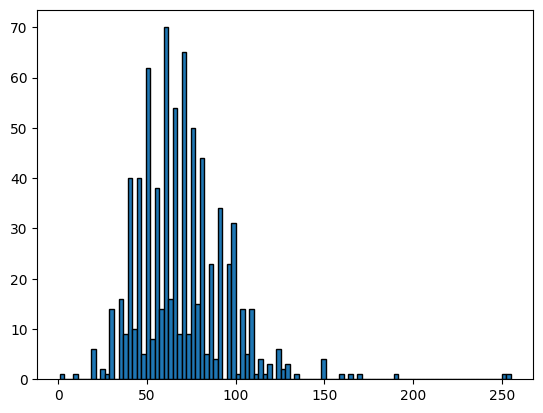

In [90]:
# Biểu đồ histogram thể hiện số lượng điểm dữ liệu có giá trị theo cột nào đó rơi vào từng khoảng.
# Ex: Trong khoảng giá trị 0 đến 10 có 50 điểm dữ liệu.
plt.hist(np.array(data_HP['HP']), bins = 100, ec = 'black')

In [91]:
Q1, Q2, Q3 = np.quantile(np.array(data_HP['HP']), 0.25), np.quantile(np.array(data_HP['HP']), 0.5), np.quantile(np.array(data_HP['HP']), 0.75)
minV, maxV = np.min(np.array(data_HP['HP'])), np.max(np.array(data_HP['HP']))
print(minV, Q1, Q2, Q3, maxV)

1 50.0 65.0 80.0 255


>Nhận xét:
* [minv, Q1] và [Q3, maxV] có range khá rộng, ta sẽ chia thêm thành các đoạn nhỏ hơn, việc này giúp việc `xấp xỉ hóa` mềm mại hơn (xấp xỉ 1 giá trị quá lớn về 1 giá trị quá nhỏ là không hợp lý).

In [92]:
range_1 = Q1-minV
range_2 = maxV-Q3
Q1_1 = minV+range_1/3
Q1_2 = minV+2*range_1/3
Q3_1 = Q3+range_2/3
Q3_2 = Q3+2*range_2/3

bins = [minV-1, Q1_1, Q1_2, Q1, Q2, Q3, Q3_1, Q3_2, maxV]
print(bins)

[0, 17.333333333333332, 33.666666666666664, 50.0, 65.0, 80.0, 138.33333333333334, 196.66666666666669, 255]


In [93]:
# pd.cut(): chia không đều
data_HP['HP_bin_Adap'] = pd.cut(np.array(data['HP']), bins).astype('object')
display(data_HP)

,HP,Win_Percent,HP_bin_Adap
0,45,0.278195,"(33.667, 50.0]"
1,60,0.380165,"(50.0, 65.0]"
2,80,0.674242,"(65.0, 80.0]"
3,80,0.560000,"(65.0, 80.0]"
4,39,0.491071,"(33.667, 50.0]"
...,...,...,...
779,50,0.371429,"(33.667, 50.0]"
780,50,0.885496,"(33.667, 50.0]"
781,80,0.504202,"(65.0, 80.0]"
782,80,0.618056,"(65.0, 80.0]"


* Gom tất cả các giá trị trong cùng 1 khoảng lại và tính trung bình để tìm ra các giá trị mới.

In [94]:
HP_bin_Adap_Dict = data_HP.groupby('HP_bin_Adap')['HP'].mean()
print(HP_bin_Adap_Dict)

HP_bin_Adap
(0.0, 17.333]           5.500000
(17.333, 33.667]       26.913043
(33.667, 50.0]         44.403315
(50.0, 65.0]           60.025907
(65.0, 80.0]           74.060914
(80.0, 138.333]        98.455056
(138.333, 196.667]    160.625000
(196.667, 255.0]      252.500000
Name: HP, dtype: float64


* Map 'HP_bin_Adap_Dict' vào 'data_HP' để cập nhật lại các giá trị ở cột 'HP'

In [95]:
data_HP['HP_bin_Adap_Mean'] = data_HP['HP_bin_Adap'].map(HP_bin_Adap_Dict)
display(data_HP.head())

,HP,Win_Percent,HP_bin_Adap,HP_bin_Adap_Mean
0,45,0.278195,"(33.667, 50.0]",44.403315
1,60,0.380165,"(50.0, 65.0]",60.025907
2,80,0.674242,"(65.0, 80.0]",74.060914
3,80,0.560000,"(65.0, 80.0]",74.060914
4,39,0.491071,"(33.667, 50.0]",44.403315


In [96]:
StatsDF = data_HP.corr()
StatsDF.style.background_gradient(cmap='coolwarm')

,HP,Win_Percent,HP_bin_Adap_Mean
HP,1.000000,0.261602,0.962597
Win_Percent,0.261602,1.000000,0.251511
HP_bin_Adap_Mean,0.962597,0.251511,1.000000


>**Nhận xét:**
* Tương quan giữa giá trị HP mới ở cột 'HP_bin_Adap_Mean' còn nhỏ hơn giá trị cũ ở cột 'HP' khi chưa thực hiện `xấp xỉ hóa.`

###### **4.2.2 Chia Bins tự động thành các phần bằng nhau**
* Searching on Fix-Width Bins: 3-15 parts.(Searching từ 3 đến 15 bin.)

In [97]:
data_HP = data[['HP', 'Win_Percent']]
display(data_HP.head())

,HP,Win_Percent
0,45,0.278195
1,60,0.380165
2,80,0.674242
3,80,0.560000
4,39,0.491071


In [98]:
col = 'HP'
for bin in range(3, 15):
  bin_group = f'{col}_bin{bin}_Fixed'
  data_HP[bin_group] = pd.qcut(np.array(data_HP[col]), q=bin).astype('object') # pd.qcut(): chia đều
  HP_bin_Fixed_Dict = data_HP.groupby(bin_group)[col].mean()
  bin_group_adap = bin_group+'_AdapMean'
  data_HP[bin_group_adap] = data_HP[bin_group].map(HP_bin_Fixed_Dict)
display(data_HP.head())

,HP,Win_Percent,HP_bin3_Fixed,HP_bin3_Fixed_AdapMean,HP_bin4_Fixed,HP_bin4_Fixed_AdapMean,HP_bin5_Fixed,HP_bin5_Fixed_AdapMean,HP_bin6_Fixed,HP_bin6_Fixed_AdapMean,...,HP_bin10_Fixed,HP_bin10_Fixed_AdapMean,HP_bin11_Fixed,HP_bin11_Fixed_AdapMean,HP_bin12_Fixed,HP_bin12_Fixed_AdapMean,HP_bin13_Fixed,HP_bin13_Fixed_AdapMean,HP_bin14_Fixed,HP_bin14_Fixed_AdapMean
0,45,0.278195,"(0.999, 59.0]",45.134831,"(0.999, 50.0]",42.072816,"(0.999, 50.0]",42.072816,"(0.999, 45.0]",38.275362,...,"(40.0, 50.0]",47.504202,"(40.0, 49.0]",44.879310,"(40.0, 45.0]",44.470588,"(40.0, 45.0]",44.470588,"(40.0, 45.0]",44.470588
1,60,0.380165,"(59.0, 75.0]",66.883019,"(50.0, 65.0]",60.025907,"(50.0, 60.0]",57.826772,"(59.0, 65.0]",62.128788,...,"(55.0, 60.0]",59.654321,"(54.0, 60.0]",58.194915,"(59.0, 60.0]",60.000000,"(55.0, 60.0]",59.654321,"(55.0, 60.0]",59.654321
2,80,0.674242,"(75.0, 255.0]",96.753968,"(65.0, 80.0]",74.060914,"(70.0, 86.8]",78.348387,"(75.0, 90.0]",83.064000,...,"(78.1, 86.8]",81.730769,"(75.0, 80.0]",79.171875,"(75.0, 80.0]",79.171875,"(78.0, 84.0]",80.290909,"(75.0, 80.0]",79.171875
3,80,0.560000,"(75.0, 255.0]",96.753968,"(65.0, 80.0]",74.060914,"(70.0, 86.8]",78.348387,"(75.0, 90.0]",83.064000,...,"(78.1, 86.8]",81.730769,"(75.0, 80.0]",79.171875,"(75.0, 80.0]",79.171875,"(78.0, 84.0]",80.290909,"(75.0, 80.0]",79.171875
4,39,0.491071,"(0.999, 59.0]",45.134831,"(0.999, 50.0]",42.072816,"(0.999, 50.0]",42.072816,"(0.999, 45.0]",38.275362,...,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678


In [99]:
Corr_DF = data_HP.corr()
Corr_DF.style.background_gradient(cmap='coolwarm')

,HP,Win_Percent,HP_bin3_Fixed_AdapMean,HP_bin4_Fixed_AdapMean,HP_bin5_Fixed_AdapMean,HP_bin6_Fixed_AdapMean,HP_bin7_Fixed_AdapMean,HP_bin8_Fixed_AdapMean,HP_bin9_Fixed_AdapMean,HP_bin10_Fixed_AdapMean,HP_bin11_Fixed_AdapMean,HP_bin12_Fixed_AdapMean,HP_bin13_Fixed_AdapMean,HP_bin14_Fixed_AdapMean
HP,1.000000,0.261602,0.829453,0.872050,0.888005,0.904684,0.917497,0.920433,0.932583,0.933641,0.934959,0.935526,0.937878,0.943175
Win_Percent,0.261602,1.000000,0.333381,0.298571,0.308210,0.315046,0.314749,0.309200,0.300081,0.296735,0.300542,0.301772,0.299976,0.298222
HP_bin3_Fixed_AdapMean,0.829453,0.333381,1.000000,0.907867,0.906004,0.916843,0.890884,0.884864,0.889414,0.884133,0.880537,0.886616,0.880907,0.878170
HP_bin4_Fixed_AdapMean,0.872050,0.298571,0.907867,1.000000,0.961524,0.937739,0.938820,0.947435,0.923991,0.927939,0.931689,0.932150,0.928446,0.924590
HP_bin5_Fixed_AdapMean,0.888005,0.308210,0.906004,0.961524,1.000000,0.952786,0.952445,0.953326,0.949118,0.951120,0.943517,0.943828,0.942217,0.940042
HP_bin6_Fixed_AdapMean,0.904684,0.315046,0.916843,0.937739,0.952786,1.000000,0.968698,0.963916,0.951851,0.953011,0.964232,0.967032,0.962061,0.954071
HP_bin7_Fixed_AdapMean,0.917497,0.314749,0.890884,0.938820,0.952445,0.968698,1.000000,0.989105,0.964466,0.965176,0.972809,0.974311,0.973051,0.972775
HP_bin8_Fixed_AdapMean,0.920433,0.309200,0.884864,0.947435,0.953326,0.963916,0.989105,1.000000,0.969704,0.971113,0.977237,0.977324,0.975753,0.974795
HP_bin9_Fixed_AdapMean,0.932583,0.300081,0.889414,0.923991,0.949118,0.951851,0.964466,0.969704,1.000000,0.996376,0.992418,0.993653,0.989812,0.984935
HP_bin10_Fixed_AdapMean,0.933641,0.296735,0.884133,0.927939,0.951120,0.953011,0.965176,0.971113,0.996376,1.000000,0.993983,0.994656,0.992336,0.985903


>**Nhận Xét:**
* Với các bin=3, 6, 8 các giá trị tương quan đều tốt.
* Nếu chọn bin=3 thì các khoảng sẽ có range khá rộng dẫn đến việc `xấp xỉ hoas` không mềm mại. Vì thế nên chọn bin=6 hoặc bin=8.
* Trong phần này ta chọn bin=6

In [100]:
Best_HP = Corr_DF.loc['Win_Percent'].sort_values(ascending=False).keys()[2]
Best_HP

'HP_bin6_Fixed_AdapMean'

In [101]:
data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_Percent
0,1,45,49,49,65,65,45,0.278195
1,2,60,62,63,80,80,60,0.380165
2,3,80,82,83,100,100,80,0.674242
3,4,80,100,123,122,120,80,0.560000
4,5,39,52,43,60,50,65,0.491071


In [102]:
data['HP'] = data_HP[Best_HP]
display(data.head())

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_Percent
0,1,38.275362,49,49,65,65,45,0.278195
1,2,62.128788,62,63,80,80,60,0.380165
2,3,83.064000,82,83,100,100,80,0.674242
3,4,83.064000,100,123,122,120,80,0.560000
4,5,38.275362,52,43,60,50,65,0.491071


##### **4.3 Xử lý noisy cột 'Defense'**
* Các bước tương tự như 'HP'